# Time metrics

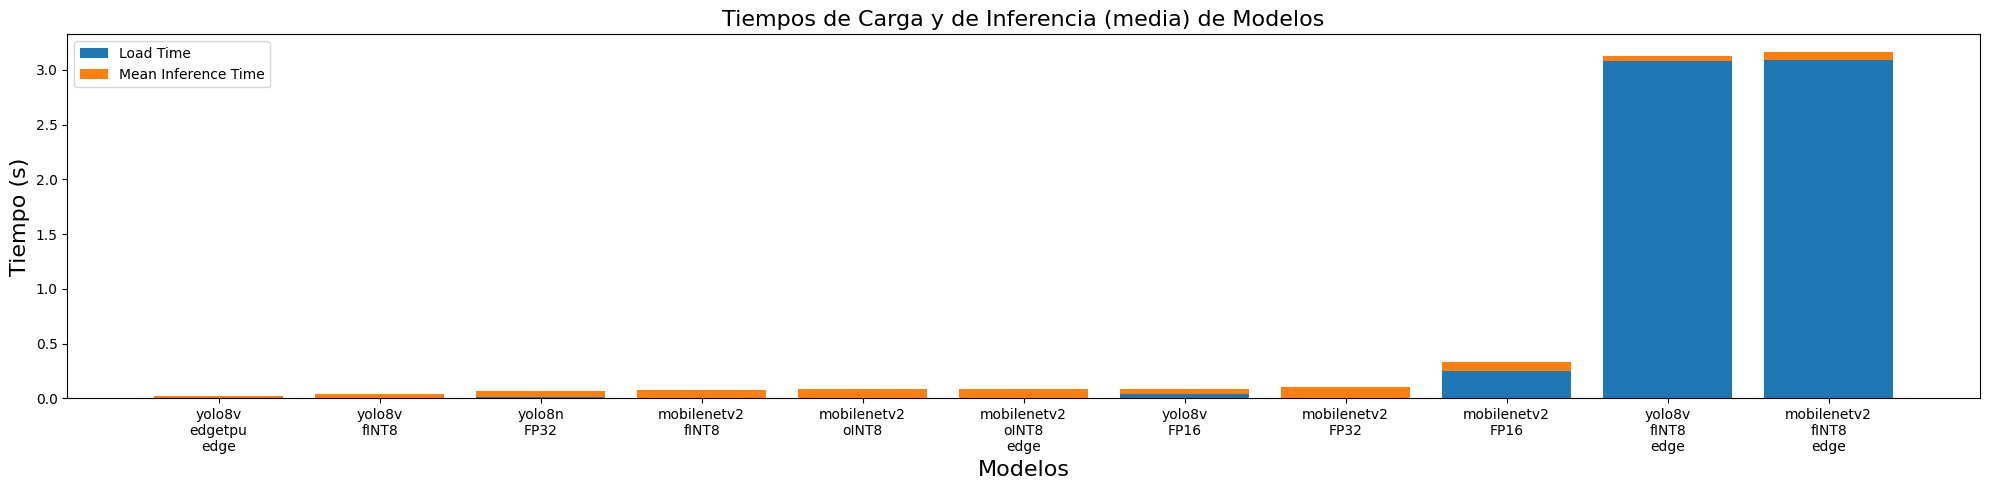

In [20]:
import matplotlib.pyplot as plt
import json
import os

# Inicializar el diccionario para almacenar los tiempos
model_times = {}

# Cargar los datos de cada modelo
json_files = [file for file in os.listdir() if file.endswith('.json')]
for json_file in json_files:
    # Cargar el archivo JSON
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Obtener el tiempo de carga
    load_time = data['load time']

    # Filtrar el diccionario para eliminar la clave "load time" y poder mirar inferencias individuales
    filtered_data = {key: value for key, value in data.items() if key != "load time"}

    # Calcular el tiempo medio de inferencia
    inference_times = [value['inference time'] for value in filtered_data.values()]
    mean_inference_time = sum(inference_times) / len(inference_times) if inference_times else 0

    # Añadir al diccionario
    name = json_file.replace('.json', '')
    name = name.replace('_', '\n')
    model_times[name] = {
        'load_time': load_time,
        'mean_inference_time': mean_inference_time,
        'total_time': load_time + mean_inference_time
    }

    # print(f"Model: {name}")
    # print(f" · Load Time: {load_time}")
    # print(f" · Mean Inference Time: {mean_inference_time}")
    # print(f" · Total time: {model_times[name]['total_time']}")

# Ordenar los modelos por 'total_time' de menor a mayor
sorted_models = sorted(model_times.items(), key=lambda x: x[1]['total_time'])

# Etiquetas para el eje X y valores para el gráfico en el orden correcto
xticks_labels = [model[0] for model in sorted_models]
load_times = [model[1]['load_time'] for model in sorted_models]
mean_inference_times = [model[1]['mean_inference_time'] for model in sorted_models]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(20, 5))
plt.bar(xticks_labels, load_times, label='Load Time')
plt.bar(xticks_labels, mean_inference_times, label='Mean Inference Time', bottom=load_times)

# Añadir etiquetas y título
plt.xlabel('Modelos', size=16)
plt.ylabel('Tiempo (s)', size=16)
plt.xticks(rotation=0)
plt.ylabel('Tiempo (s)')
plt.title('Tiempos de Carga y de Inferencia (media) de Modelos', size=16)
plt.legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

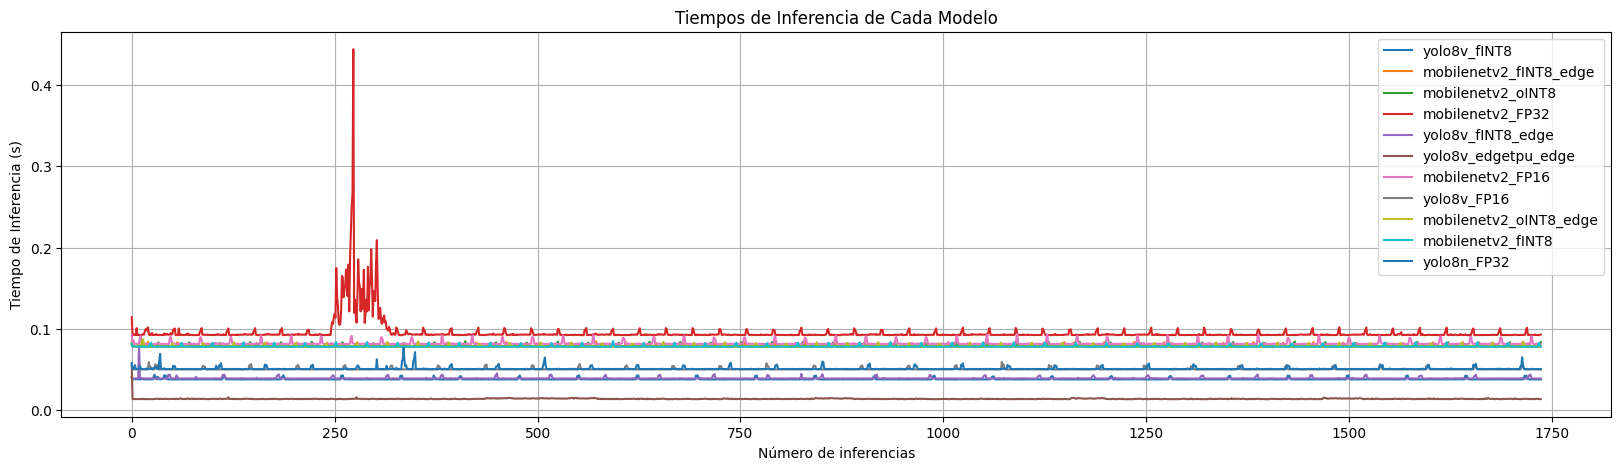

In [5]:
import matplotlib.pyplot as plt
import json
import os

# Inicializar un diccionario para almacenar los tiempos de inferencia de cada modelo
inference_times_dict = {}

# Cargar los datos de cada modelo
json_files = [file for file in os.listdir() if file.endswith('.json')]
for json_file in json_files:
    # Crear un nombre corto eliminando "_inference_metrics.json"
    name = json_file.replace('.json', '')

    # Cargar el archivo JSON
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Obtener el tiempo de carga
    load_time = data['load time']

    # Filtrar el diccionario para eliminar la clave "load time" y poder mirar inferencias individuales
    filtered_data = {key: value for key, value in data.items() if key != "load time"}

    # Extraer los tiempos de inferencia y almacenarlos
    inference_times = [value['inference time'] for value in filtered_data.values()]

    # Guardar los tiempos de inferencia en el diccionario usando el nombre corto
    inference_times_dict[name] = inference_times

# Graficar los tiempos de inferencia de cada modelo
plt.figure(figsize=(20, 5))
for model, times in inference_times_dict.items():
    plt.plot(times, label=model)  # Cada lista de tiempos de inferencia es una línea

plt.xlabel('Número de inferencias')
plt.ylabel('Tiempo de Inferencia (s)')
plt.title('Tiempos de Inferencia de Cada Modelo')
plt.legend()
plt.grid(True)
plt.show()

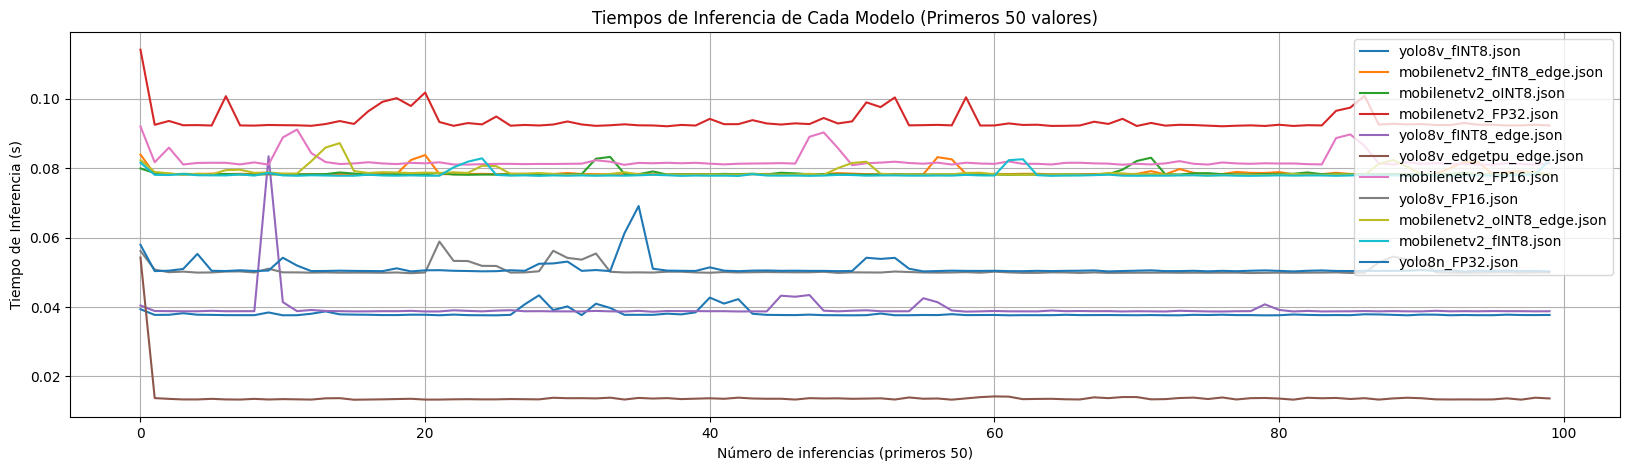

In [13]:
import matplotlib.pyplot as plt
import json
import os

# Inicializar un diccionario para almacenar los tiempos de inferencia de cada modelo
inference_times_dict = {}

# Cargar los datos de cada modelo
json_files = [file for file in os.listdir() if file.endswith('.json')]
for json_file in json_files:
    # Crear un nombre corto eliminando "_inference_metrics.json"
    name = json_file.replace('_inference_metrics.json', '')

    # Cargar el archivo JSON
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Obtener el tiempo de carga
    load_time = data['load time']

    # Filtrar el diccionario para eliminar la clave "load time" y poder mirar inferencias individuales
    filtered_data = {key: value for key, value in data.items() if key != "load time"}

    # Extraer los tiempos de inferencia y almacenarlos
    inference_times = [value['inference time'] for value in filtered_data.values()]

    # Guardar los primeros 50 tiempos de inferencia en el diccionario usando el nombre corto
    inference_times_dict[name] = inference_times[:100]  # Solo los primeros 50 valores

# Graficar los tiempos de inferencia de cada modelo
plt.figure(figsize=(20, 5))
for model, times in inference_times_dict.items():
    plt.plot(times, label=model)  # Cada lista de tiempos de inferencia es una línea

plt.xlabel('Número de inferencias (primeros 50)')
plt.ylabel('Tiempo de Inferencia (s)')
plt.title('Tiempos de Inferencia de Cada Modelo (Primeros 50 valores)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()